In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Add_sales_data_2018.csv')

In [4]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [6]:
df.shape

(205, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [8]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


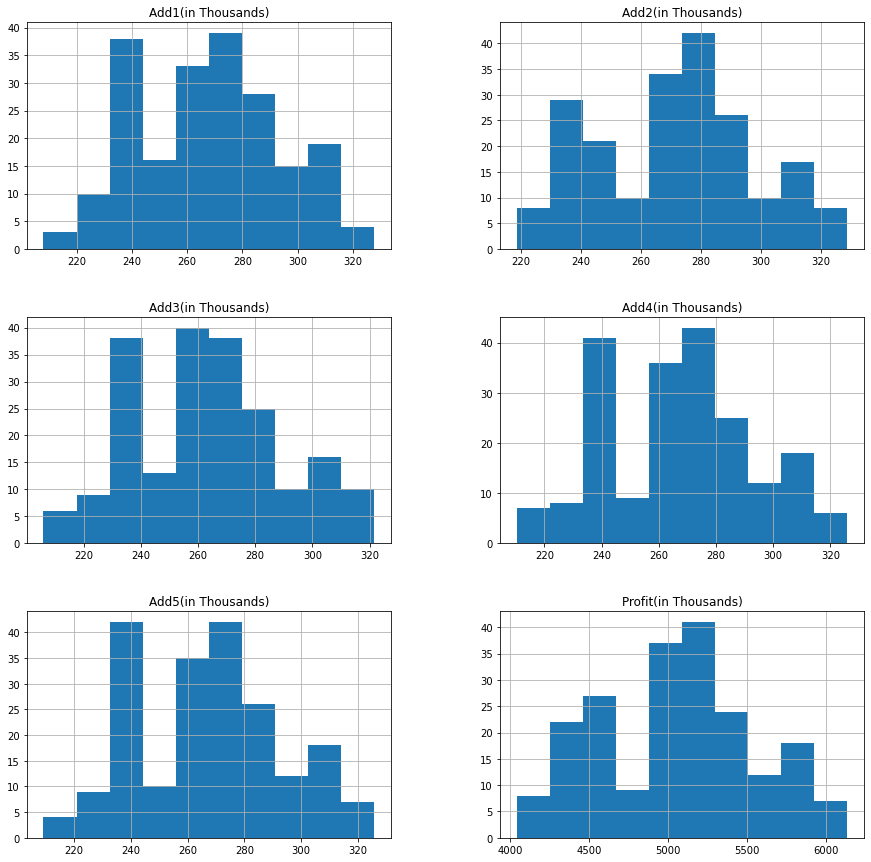

In [30]:
df.hist(figsize=(15,15))
plt.show()

The data seems to be normally distributed

In [32]:
df.columns()

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

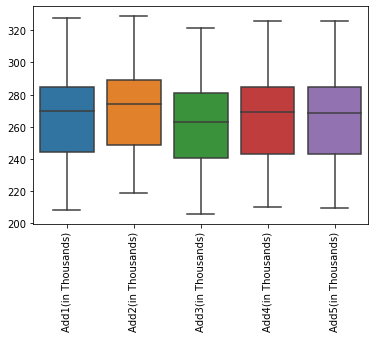

In [39]:
plt.figsize=(15,15)
data=df[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

No outliers

# check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

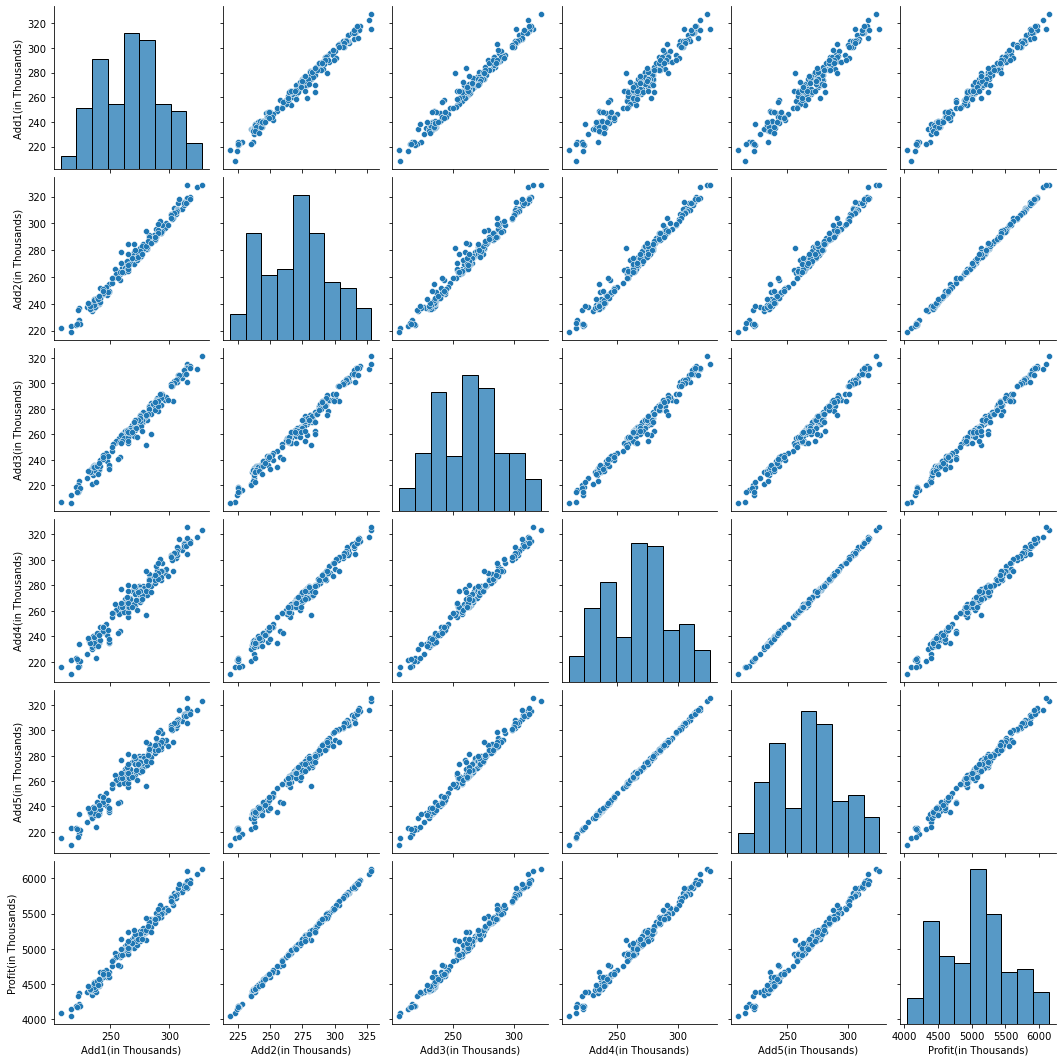

In [41]:
sns.pairplot(df)

Data is normally distributed
Data follows normal distribution  
Hence,meeting the assumption of the Linear regression algorithm

In [42]:
corr=df.corr()

In [10]:
corr

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

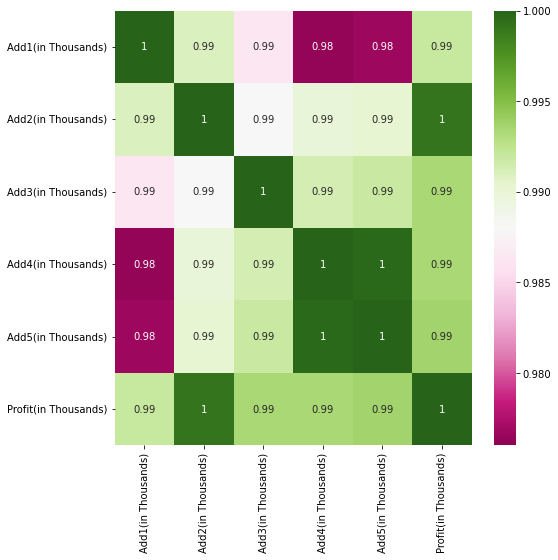

In [43]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,vmin=0.976,vmax=1,annot=True,cmap='PiYG')

In [44]:
#Add1 has a positive co relation of 0.99 with the profit
#Add2 has a positive co relation of 1 with the profit
#Add3 has a positive co relation of 0.99 with the profit
#Add4 has a positive co relation of 0.99 with the profit
#Add5 has a positive co relation of 0.99 with the profit
#Maximum correlation is between Add2 & profit

# Build a regression model to predict the profit from the given data and comment your findings on it.

In [46]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [64]:
y=df['Profit(in Thousands)']
x=df.drop(['Date','Profit(in Thousands)'],axis=1)


In [49]:

from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [52]:
from sklearn import linear_model

In [57]:
lr = linear_model.LinearRegression()

In [58]:
model = lr.fit(X_train,Y_train)

In [59]:
prediction = model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
print('Mean square Error is : ',mean_squared_error(Y_test,prediction))

Mean square Error is :  8.11273293080854e-25


Since the MSE is very low , better will be the line of fit


# Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [67]:
Forecast=np.array([290,312,309,298,320]).reshape(1,5)
Forecast_Profit=model.predict(Forecast)
print("The profit forecasted from the given values from 5 companies is " ,Forecast_Profit)

The profit forecasted from the given values from 5 companies is  [5820.06]
